In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12
import seaborn as sns

In [2]:
import missingno as msno
# pip install plotnine # 시각화 라이브러리 => R에서 시각화하는 방법과 유사하게 시각화한다.
from plotnine import *

In [3]:
# 현재 소스 프로그램의 위치(경로)를 보여준다.
%pwd

'C:\\k_digital\\kdigital\\python\\dataAnalysis'

In [4]:
# 현재 소스 프로그램이 위치한 경로의 파일 목록을 보여준다.
%ls
# '%ls 폴더이름'으로 실행하면 현재 소스 프로그램이 위치한 경로 아래의 지정된 폴더의 파일 목록을 보여준다.

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 9476-D63A

 C:\k_digital\kdigital\python\dataAnalysis 디렉터리

2024-05-01  오후 05:38    <DIR>          .
2024-05-01  오후 05:38    <DIR>          ..
2024-05-01  오후 05:38    <DIR>          .ipynb_checkpoints
2024-04-24  오전 10:18           155,282 01_numpy_1.ipynb
2024-04-24  오후 04:07            35,444 02_numpy_2.ipynb
2024-04-25  오전 11:58            56,807 03_numpy_3.ipynb
2024-04-25  오후 04:13            99,213 04_pandas_1.ipynb
2024-04-26  오후 04:35            72,797 05_pandas_2.ipynb
2024-04-26  오후 04:35           137,690 06_pandas_3.ipynb
2024-04-26  오후 06:15           182,872 07_pandas_4.ipynb
2024-04-29  오후 12:12           105,937 08_pandas_5.ipynb
2024-04-29  오후 01:14            56,278 09_pandas_6.ipynb
2024-04-29  오후 05:20            45,233 10_pandas_7.ipynb
2024-04-30  오전 10:16           188,231 11_matplotlib_hangle.ipynb
2024-04-30  오전 11:17           106,602 12_anscombe.ipynb
2024-04-30  오전 11:45         3,747,495 13_Visualization_Matplotlib_Seaborn

2015년 10월부터 2023년 6월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향  
공공데이터포털(https://www.data.go.kr/) 에서 '민간아파트' 검색

<img src="./민간아파트1.png" align="left" width="1000"/>

<img src="./민간아파트2.png" align="left" width="1000"/>

분석하기 위한 데이터가 저장된 csv 파일을 읽는다.

In [5]:
# pandas의 read_csv() 메소드로 csv 파일이나 tsv 파일을 읽을 때 한글 인코딩 문제로 아래와 같은 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte 에러가 발생할 수 있다.
# perSale = pd.read_csv('./data/perSale_2023_06.csv')
# UnicodeDecodeError가 발생하면 encoding 옵션 값을 'euc-kr' 또는 'cp949'로 지정해야 정상적으로 파일을 읽어올 수 있다.
# perSale = pd.read_csv('./data/perSale_2023_06.csv', encoding='euc-kr')
perSale = pd.read_csv('./data/perSale_2023_06.csv', encoding='cp949')
print(perSale.shape)
perSale.head()

(7905, 5)


,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


encoding 옵션을 사용하지 않으려면 csv 파일을 메모장으로 열고 파일 메뉴의 다른 이름으로 저장에서 인코딩 방식을 ANSI에서 UTF-8로 변경한 후 저장하면 된다.

<img src="./민간아파트3.png" align="left" width="1000"/>

dtypes 속성이나 info() 메소드를 이용해서 데이터프레임을 구성하는 각 시리즈(열)의 데이터 타입을 확인하고 필요하다면 데이터 타입을 변경한다.

In [6]:
perSale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [7]:
perSale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [8]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다.
# perSale['연도'] = perSale['연도'].astype(str)
# perSale['연도'] = perSale.get('연도').astype(str)
perSale['연도'] = perSale.연도.astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 때 '데이터프레임[열]', '데이터프레임.get(열)', '데이터프레임.열'과 같이
# 3가지 방식이 모두 사용 가능하지만 2개 이상의 열을 얻어올 경우는 '데이터프레임.열' 방식은 사용할 수 없다.
# 2개 이상의 열을 얻어올 때는 얻어오려는 열 이름을 리스트 형태로 묶어서 사용해야 한다.
# 데이터프레임의 특정 열에 데이터를 넣어줄 때는 '데이터프레임.get(열)' 방식은 사용할 수 없다.
# perSale['월'] = perSale['월'].astype(str)
# perSale.get('월') = perSale['월'].astype(str) # 에러
perSale.월 = perSale.월.astype(str)

In [9]:
# 분양가격(제곱미터) 열은 연산에 사용할 데이터이므로 숫자로 변경한다.
# astype() 메소드는 문자열을 숫자로 변경하려는 경우 숫자가 아닌 문자열이 있으면 에러가 발생된다.
# perSale['분양가격(제곱미터)'] = perSale['분양가격(제곱미터)'].astype(float) # 에러
# 이 때, to_numeric() 메소드를 사용하면 어느정도 오류를 제어할 수 있다.
# to_numeric() 메소드의 errors 속성은 생략시 'raise'가 기본값으로 숫자로 변경할 수 없는 값이 있으면 오류가 발생된다.
# errors 속성을 'ignore'로 지정하면 숫자로 변경할 수 없는 값이 있으면 메소드를 무시한다. 실행하지 않는다.
# errors 속성을 'coerce'로 지정하면 숫자로 변경할 수 없는 값은 누락값(NaN)으로 처리한다.
perSale['분양가격(제곱미터)'] = pd.to_numeric(perSale['분양가격(제곱미터)'], errors='coerce')

In [10]:
# 숫자로 변경된 '분양가격(제곱미터)' 열을 이용해서 평당 분양 가격을 계산한 열을 추가한다.
perSale['평당분양가격'] = perSale['분양가격(제곱미터)'] * 3.3
perSale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [11]:
perSale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [12]:
# isnull() 메소드와 sum() 메소드를 사용해서 누락값이 존재하는가 확인한다.
print(perSale.isnull().sum())

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    583
평당분양가격        583
dtype: int64


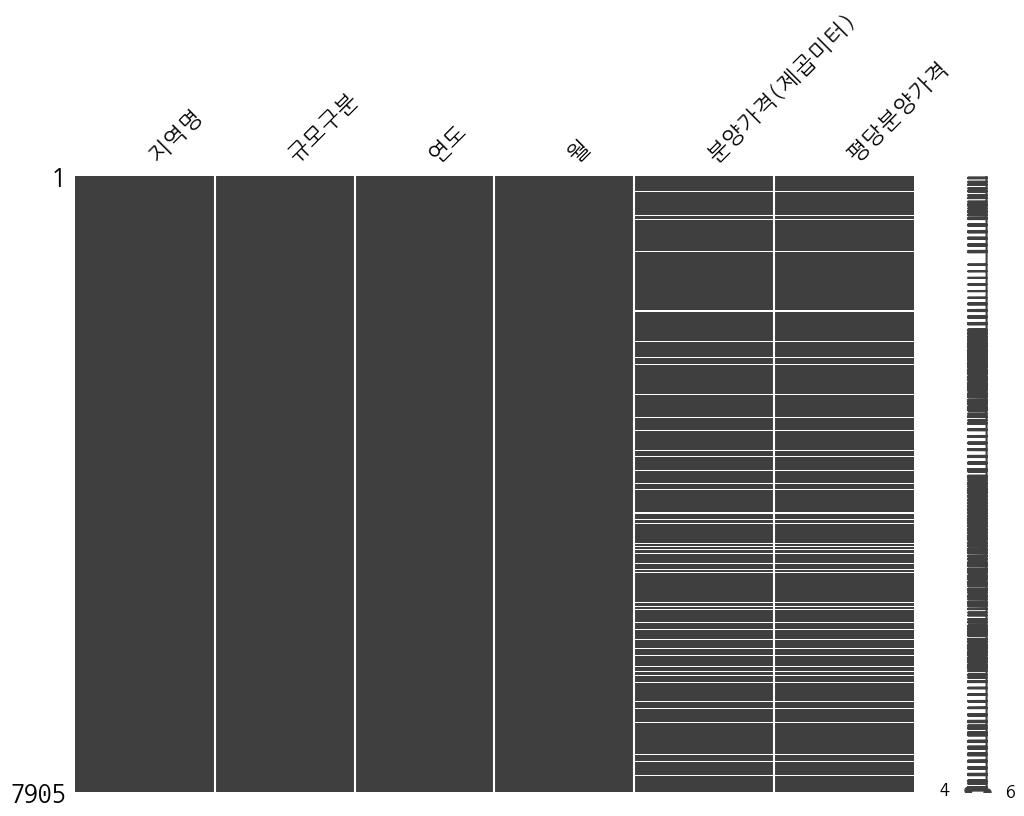

In [13]:
# missingno 라이브러리를 이용해서 누락값 위치 확인하기 => 흰색으로 보이는 부분이 누락값이다.
# matrix() 함수에 figsize 옵션을 지정하면 누락값의 위치가 표시되는 그래프의 크기를 변경할 수 있다.
msno.matrix(perSale, figsize=[12, 8])
plt.show()

In [14]:
# 2017년 데이터만 추출한다.
perSale_2017 = perSale[perSale.연도 == '2017']
print(perSale_2017.shape)
perSale_2017.head()

(1020, 6)


,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
1275,서울,모든면적,2017,1,6450.0,21285.0
1276,서울,전용면적 60제곱미터이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102제곱미터초과,2017,1,6771.0,22344.3


In [15]:
# 지역별 데이터가 동일하게 저장되어 있다.
# perSale.지역명.count() # count() 메소드는 전체 데이터의 개수를 센다.
perSale.지역명.value_counts() # value_counts() 메소드는 같은 데이터의 개수를 센다.

서울    465
강원    465
경남    465
경북    465
전남    465
전북    465
충남    465
충북    465
세종    465
인천    465
울산    465
대전    465
광주    465
대구    465
부산    465
경기    465
제주    465
Name: 지역명, dtype: int64

In [16]:
# 규모구분별 데이터가 동일하게 저장되어 있다.
perSale.규모구분.value_counts()

모든면적                       1581
전용면적 60제곱미터이하              1581
전용면적 60제곱미터초과 85제곱미터이하     1581
전용면적 85제곱미터초과 102제곱미터이하    1581
전용면적 102제곱미터초과             1581
Name: 규모구분, dtype: int64

전국 연도별 평균 평당 분양 가격

In [17]:
# perSale.groupby('연도')['평당분양가격'].mean()
perSale.groupby(perSale.연도).평당분양가격.mean()

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
2022    14942.504494
2023    16277.103106
Name: 평당분양가격, dtype: float64

In [18]:
perSale.groupby(['연도', '규모구분']).평당분양가격.mean()

연도    규모구분                   
2015  모든면적                        8893.047059
      전용면적 102제곱미터초과              9837.226667
      전용면적 60제곱미터이하               8951.525000
      전용면적 60제곱미터초과 85제곱미터이하      8891.817647
      전용면적 85제곱미터초과 102제곱미터이하     9518.506250
2016  모든면적                        9293.042647
      전용면적 102제곱미터초과             10388.728272
      전용면적 60제곱미터이하               9398.876119
      전용면적 60제곱미터초과 85제곱미터이하      9295.986765
      전용면적 85제곱미터초과 102제곱미터이하    10122.355435
2017  모든면적                        9927.322059
      전용면적 102제곱미터초과             11311.244162
      전용면적 60제곱미터이하              10271.375635
      전용면적 60제곱미터초과 85제곱미터이하      9840.438235
      전용면적 85제곱미터초과 102제곱미터이하    10573.447977
2018  모든면적                       10675.825123
      전용면적 102제곱미터초과             11445.574576
      전용면적 60제곱미터이하              10844.409783
      전용면적 60제곱미터초과 85제곱미터이하     10650.611823
      전용면적 85제곱미터초과 102제곱미터이하    11441.707895
2019  모든면적                       11602.715816
    

In [19]:
# pd.options.display.float_format를 사용해서 데이터프레임에 저장된 실수 데이터의 출력 형식을 지정할 수 있다.
# {:,.1f}는 ','는 천 단위마다 ','를 출력하고 '.'뒤의 숫자만큼 소수점 아래 자리를 표시한다.
# 'f'대신 지수 기호 'e'를 사용하면 지수 형태로 표시된다.
pd.options.display.float_format = '{:,.1f}'.format

In [20]:
# describe() 메소드로 개수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수(중위수), 3사분위수, 최대값을
# 한번에 확인할 수 있다.
perSale.describe()

,분양가격(제곱미터),평당분양가격
count,"7,322.0","7,322.0"
mean,"3,723.1","12,286.4"
std,"1,533.5","5,060.6"
min,"1,868.0","6,164.4"
25%,"2,675.2","8,828.3"
50%,"3,273.0","10,800.9"
75%,"4,295.8","14,176.0"
max,"13,835.0","45,655.5"


In [21]:
perSale.groupby(perSale.연도).describe()

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   
2022      979.0 4,528.0 1,521.7 2,657.0 3,284.5 4,189.0 5,231.5 10,322.0   
2023      483.0 4,932.5 1,681.5 2,785.0 3,625.0 4,659.0 5,756.0 11,911.0   

     평당분양가격                                                               
      count     mean     std     min      25%      50%      75%      max  
연도                                                                        
2015  243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016  984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017  975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018  919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019  912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020  882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021  945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8  
2022  979.0 14,942.5 5,021.7 8,768.1 10,838.8 13,823.7 17,263.9 34,062.6  
2023  483.0 16,277.1 5,549.1 9,190.5 11,962.5 15,374.7 18,994.8 39,306.3

In [22]:
# describe() 메소드 실행 결과를 'T' 속성으로 전치시켜서 요약 통계량을 수직 방향으로 출력할 수 있다.
perSale.groupby(perSale.연도).describe().T

연도                   2015     2016     2017     2018     2019     2020  \
분양가격(제곱미터) count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   2,788.7  2,934.2  3,143.3  3,327.0  3,693.4  3,951.3   
           std      976.9  1,071.4  1,110.5  1,186.1  1,563.2  1,632.7   
           min    1,868.0  1,900.0  1,976.0  2,076.0  2,124.0  2,297.0   
           25%    2,225.0  2,282.0  2,373.0  2,525.0  2,635.5  2,780.5   
           50%    2,516.0  2,672.0  2,838.0  2,952.0  3,395.0  3,734.5   
           75%    3,025.5  3,148.5  3,466.0  3,698.0  4,066.2  4,441.0   
           max    7,092.0  8,096.0  7,887.0  8,098.0 12,728.0 13,835.0   
평당분양가격     count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   9,202.7  9,683.0 10,372.9 10,978.9 12,188.3 13,039.4   
           std    3,223.6  3,535.8  3,664.7  3,914.1  5,158.6  5,388.1   
           min    6,164.4  6,270.0  6,520.8  6,850.8  7,009.2  7,580.1   
           25%    7,342.5  7,530.6  7,830.9  8,332.5  8,697.1  9,175.6   
           50%    8,302.8  8,817.6  9,365.4  9,741.6 11,203.5 12,323.8   
           75%    9,984.1 10,390.0 11,437.8 12,203.4 13,418.6 14,655.3   
           max   23,403.6 26,716.8 26,027.1 26,723.4 42,002.4 45,655.5   

연도                   2021     2022     2023  
분양가격(제곱미터) count    945.0    979.0    483.0  
           mean   4,132.1  4,528.0  4,932.5  
           std    1,567.7  1,521.7  1,681.5  
           min    2,409.0  2,657.0  2,785.0  
           25%    3,057.0  3,284.5  3,625.0  
           50%    3,858.0  4,189.0  4,659.0  
           75%    4,539.0  5,231.5  5,756.0  
           max   10,746.0 10,322.0 11,911.0  
평당분양가격     count    945.0    979.0    483.0  
           mean  13,636.0 14,942.5 16,277.1  
           std    5,173.4  5,021.7  5,549.1  
           min    7,949.7  8,768.1  9,190.5  
           25%   10,088.1 10,838.8 11,962.5  
           50%   12,731.4 13,823.7 15,374.7  
           75%   14,978.7 17,263.9 18,994.8  
           max   35,461.8 34,062.6 39,306.3

전국 규모구분별 연도별 평균 평당 분양 가격

In [23]:
perSale.groupby(['규모구분', '연도']).평당분양가격.mean()

규모구분                     연도  
모든면적                     2015    8,893.0
                         2016    9,293.0
                         2017    9,927.3
                         2018   10,675.8
                         2019   11,602.7
                         2020   12,317.7
                         2021   13,706.9
                         2022   14,690.3
                         2023   15,918.6
전용면적 102제곱미터초과           2015    9,837.2
                         2016   10,388.7
                         2017   11,311.2
                         2018   11,445.6
                         2019   13,331.5
                         2020   14,068.4
                         2021   14,380.8
                         2022   15,990.6
                         2023   17,272.7
전용면적 60제곱미터이하            2015    8,951.5
                         2016    9,398.9
                         2017   10,271.4
                         2018   10,844.4
                         2019   11,506.8
                         20

pivot_table() 메소드는 엑셀의 피벗 테이블과 유사한 형태로 데이터를 리턴한다.  
pivot_table(value, index[, columns, aggfunc, fill_value])  
value: 피벗 테이블의 데이터로 사용될 열을 지정한다.  
index: 피벗 테이블의 행 인덱스로 사용될 열을 지정한다. => 행으로 그룹화 한다.  
columns: 피벗 테이블의 열 인덱스로 사용될 열을 지정한다. => 열로 그룹화 한다.  
aggfunc: 그룹화된 결과에 적용할 함수를 지정한다. => mean이 기본값으로 사용된다. => count, sum, mean, max, min, median, var, std 등을 사용할 수 있다.
fill_value: NaN이 발생될 경우 NaN을 대체할 데이터를 지정한다. => 0을 주로 사용한다.  

In [24]:
perSale_pivot = perSale.pivot_table('평당분양가격', '규모구분', '연도')
perSale_pivot

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
규모구분,,,,,,,,,
모든면적,"8,893.0","9,293.0","9,927.3","10,675.8","11,602.7","12,317.7","13,706.9","14,690.3","15,918.6"
전용면적 102제곱미터초과,"9,837.2","10,388.7","11,311.2","11,445.6","13,331.5","14,068.4","14,380.8","15,990.6","17,272.7"
전용면적 60제곱미터이하,"8,951.5","9,398.9","10,271.4","10,844.4","11,506.8","12,400.8","12,983.8","13,948.0","16,230.7"
전용면적 60제곱미터초과 85제곱미터이하,"8,891.8","9,296.0","9,840.4","10,650.6","11,677.2","12,327.5","13,644.4","14,695.2","15,673.3"
전용면적 85제곱미터초과 102제곱미터이하,"9,518.5","10,122.4","10,573.4","11,441.7","12,980.7","14,759.6","13,532.1","15,523.5","16,378.5"


규모 구분이 모든면적인 지역별 연도별 평균 평당 분양 가격

In [25]:
region_year_all = perSale[perSale.규모구분 == '모든면적']
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
7880,전북,모든면적,2023,6,"3,371.0","11,124.3"
7885,전남,모든면적,2023,6,"3,402.0","11,226.6"
7890,경북,모든면적,2023,6,"3,830.0","12,639.0"
7895,경남,모든면적,2023,6,"3,532.0","11,655.6"


In [26]:
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도')
region_year.head()

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [27]:
perSale[perSale.규모구분 == '모든면적'].pivot_table('평당분양가격', '지역명', '연도').head()

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [28]:
# pivot_table() 메소드의 실행 결과는 2번째 인수가 피벗 테이블의 인덱스로 사용되므로 인덱스로 사용된 
# 2번째 인수로 지정된 필드의 값의 데이터로 사용하고 인덱스를 새로 지정하려면 pivot_table() 메소드의 
# 실행 결과에 reset_index() 메소드를 실행하면 된다.
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
print(region_year.columns) # 열 인덱스 목록을 얻어온다.
print(region_year.columns.name) # 열 인덱스 목록의 이름을 얻어온다.
region_year.head()

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object', name='연도')
연도


연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [29]:
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '2023년']
region_year.columns.name = '일련번호' # 열 인덱스 목록의 이름을 변경한다.
region_year.head()

일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


특정 열 이름 변경

In [30]:
# rename() 메소드로 특정 열의 이름(인덱스)을 변경할 수 있다. => 다시 저장해야 변경된 이름이 적용된다.
region_year = region_year.rename(columns={'지역': '지역이름'})
region_year.head()

일련번호,지역이름,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [31]:
# inplace=True 옵션을 지정하면 다시 저장하지 않아도 데이터프레임에 결과가 반영된다.
region_year.rename(columns={'지역이름': '시도'}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [32]:
# rename() 메소드로 특정 행 인덱스를 변경할 수 있다.
region_year.rename(index={0: '영번째', 1: '일번째'}, inplace=True)
region_year.head()

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
영번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9"
일번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


전국 지역별로 2015년에서 2023년까지 평균 평당 분양 가격의 변동액

In [33]:
region_year['변동액'] = region_year['2023년'] - region_year['2015년']
region_year

일련번호,시도,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,변동액
영번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.1","12,775.9","5,616.1"
일번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5","8,015.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4","4,221.8"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4","5,329.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5","8,981.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2","7,973.9"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5","7,758.3"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2","9,336.3"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6","11,164.4"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.9","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3","3,528.8"


In [34]:
max_price = region_year.변동액.max() # np.max(region_year.변동액)
max_price
max_sido = region_year[region_year.변동액 == max_price].values[0][0]
max_sido
print('2015~2023년의 분양가는 매년 상승했으며, 상승액이 가장 큰 지역은 {}이고 상승액은 평당 {:,.0f}원 이다.'.
      format(max_sido, max_price * 1000))

2015~2023년의 분양가는 매년 상승했으며, 상승액이 가장 큰 지역은 제주이고 상승액은 평당 16,144,150원 이다.


In [35]:
min_price = region_year.변동액.min()
min_sido = region_year[region_year.변동액 == min_price].values[0][0]
print('2015~2023년의 분양가는 매년 상승했으며, 상승액이 가장 작은 지역은 {}이고 상승액은 평당 {:,.1f}원 이다.'.
      format(min_sido, min_price))

2015~2023년의 분양가는 매년 상승했으며, 상승액이 가장 작은 지역은 세종이고 상승액은 평당 3,528.8원 이다.


plotnine 라이브러리를 사용한 시각화

In [36]:
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
7880,전북,모든면적,2023,6,"3,371.0","11,124.3"
7885,전남,모든면적,2023,6,"3,402.0","11,226.6"
7890,경북,모든면적,2023,6,"3,830.0","12,639.0"
7895,경남,모든면적,2023,6,"3,532.0","11,655.6"


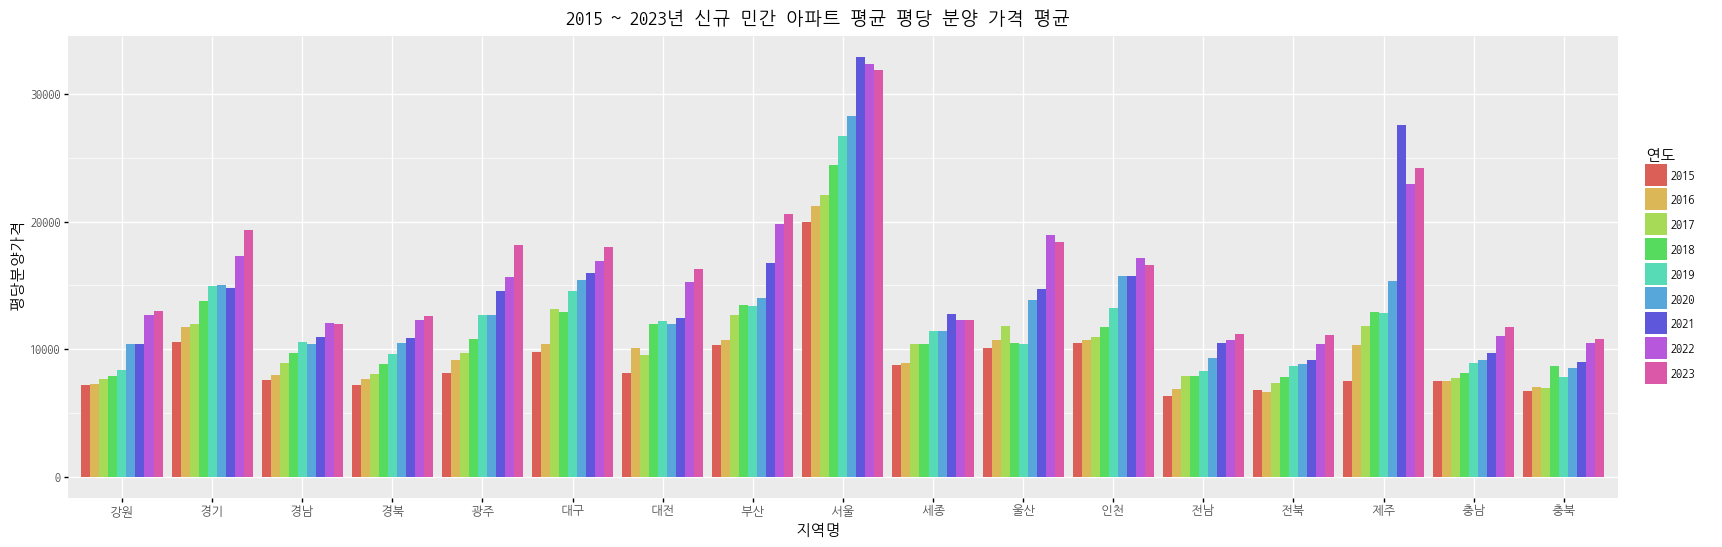

<ggplot: (-9223371888461136948)>

In [37]:
# 연도별 평균 평당 분양 가격 시각화
# ggplot(데이터프레임, aes(x=x축, y=y축, fill=범례)) # 차트 배경을 만든다.
#     + 차트함수() # 차트 배경 위에 차트를 만든다.

ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) \
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 평균')

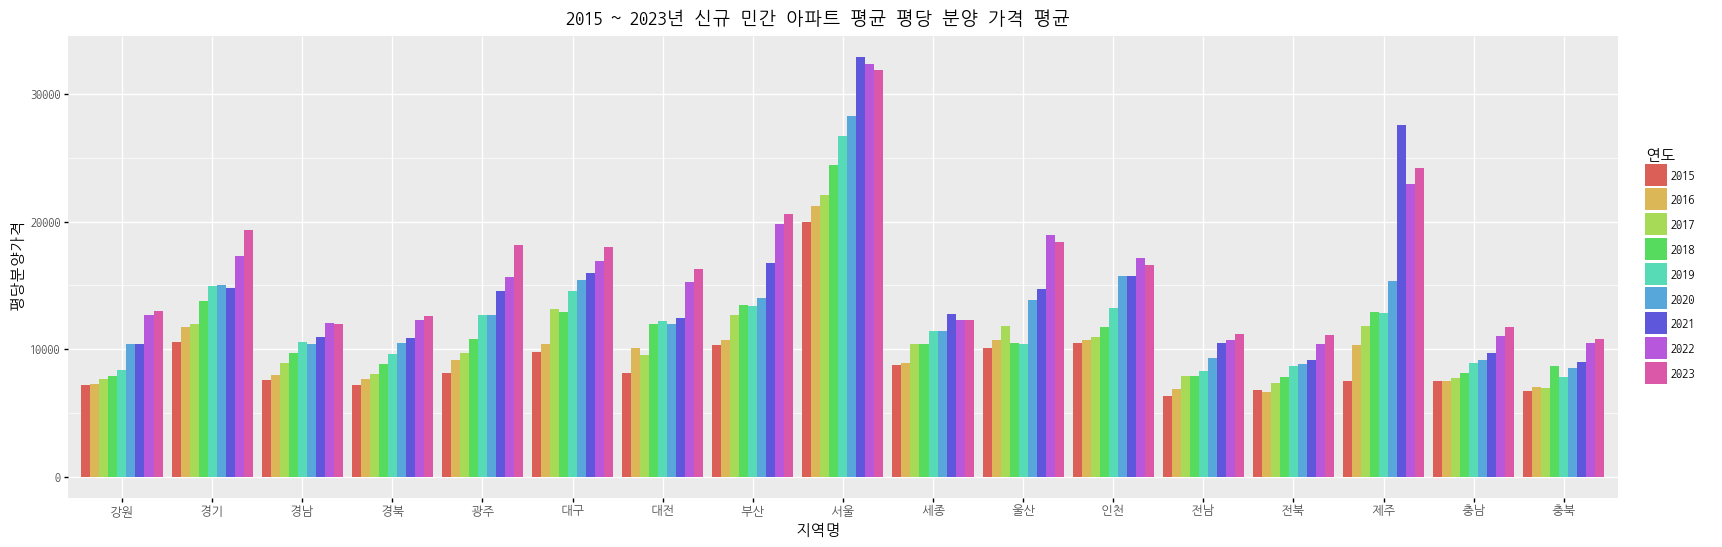

<ggplot: (-9223371888461160468)>

In [38]:
(
    ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
        + geom_bar(stat='identity', position='dodge')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 평균')
)

In [39]:
perSale

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,"7,326.0","24,175.8"
7901,제주,전용면적 60제곱미터이하,2023,6,"7,381.0","24,357.3"
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"7,084.0","23,377.2"
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"6,639.0","21,908.7"


In [40]:
# 규모구분별 지역명별 평당 분양 가격 합계 피벗 테이블
perSale_sum = perSale.pivot_table('평당분양가격', '규모구분', '지역명', 'sum').reset_index()
perSale_sum.columns.name = 'No'
perSale_sum

No,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"817,911.6","1,288,613.7","901,098.0","864,623.1","1,106,968.5","1,270,407.6","1,037,840.1","1,277,014.2","2,377,904.1","928,689.3","1,077,103.5","1,221,887.7","785,182.2","760,808.4","1,397,210.1","810,678.0","747,522.6"
1,전용면적 102제곱미터초과,"976,743.9","1,467,358.2","943,222.5","947,136.3","1,096,537.2","1,400,444.1","681,209.1","1,306,057.5","2,315,154.6","854,762.7","758,128.8","1,397,041.8","890,650.2","835,906.5","1,171,014.9","835,144.2","826,593.9"
2,전용면적 60제곱미터이하,"819,898.2","1,337,410.8","887,267.7","846,664.5","978,888.9","1,265,371.8","960,029.4","1,242,057.3","2,444,095.5","714,925.2","925,112.1","1,215,492.3","764,636.4","758,171.7","1,079,697.3","813,516.0","747,535.8"
3,전용면적 60제곱미터초과 85제곱미터이하,"803,203.5","1,285,155.3","896,685.9","862,082.1","1,095,431.7","1,271,222.7","1,033,431.3","1,274,582.1","2,373,538.2","890,310.3","1,081,888.5","1,220,914.2","782,793.0","757,610.7","1,374,390.6","837,421.2","751,271.4"
4,전용면적 85제곱미터초과 102제곱미터이하,"793,976.7","1,392,758.4","1,116,838.8","779,902.2","359,181.9","1,132,639.2","245,094.3","1,251,680.1","2,510,742.3","763,200.9","565,290.0","1,303,991.7","713,433.6","799,751.7","800,141.1","852,396.6","812,407.2"


In [41]:
perSale_melt = pd.melt(perSale_sum, '규모구분')
# perSale_melt.columns = ['규모구분', '지역명', '평당분양가격']
perSale_melt.rename(columns={'No': '지역명', 'value': '평당분양가격'}, inplace=True)
perSale_melt

,규모구분,지역명,평당분양가격
0,모든면적,강원,"817,911.6"
1,전용면적 102제곱미터초과,강원,"976,743.9"
2,전용면적 60제곱미터이하,강원,"819,898.2"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"803,203.5"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"793,976.7"
...,...,...,...
80,모든면적,충북,"747,522.6"
81,전용면적 102제곱미터초과,충북,"826,593.9"
82,전용면적 60제곱미터이하,충북,"747,535.8"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"751,271.4"


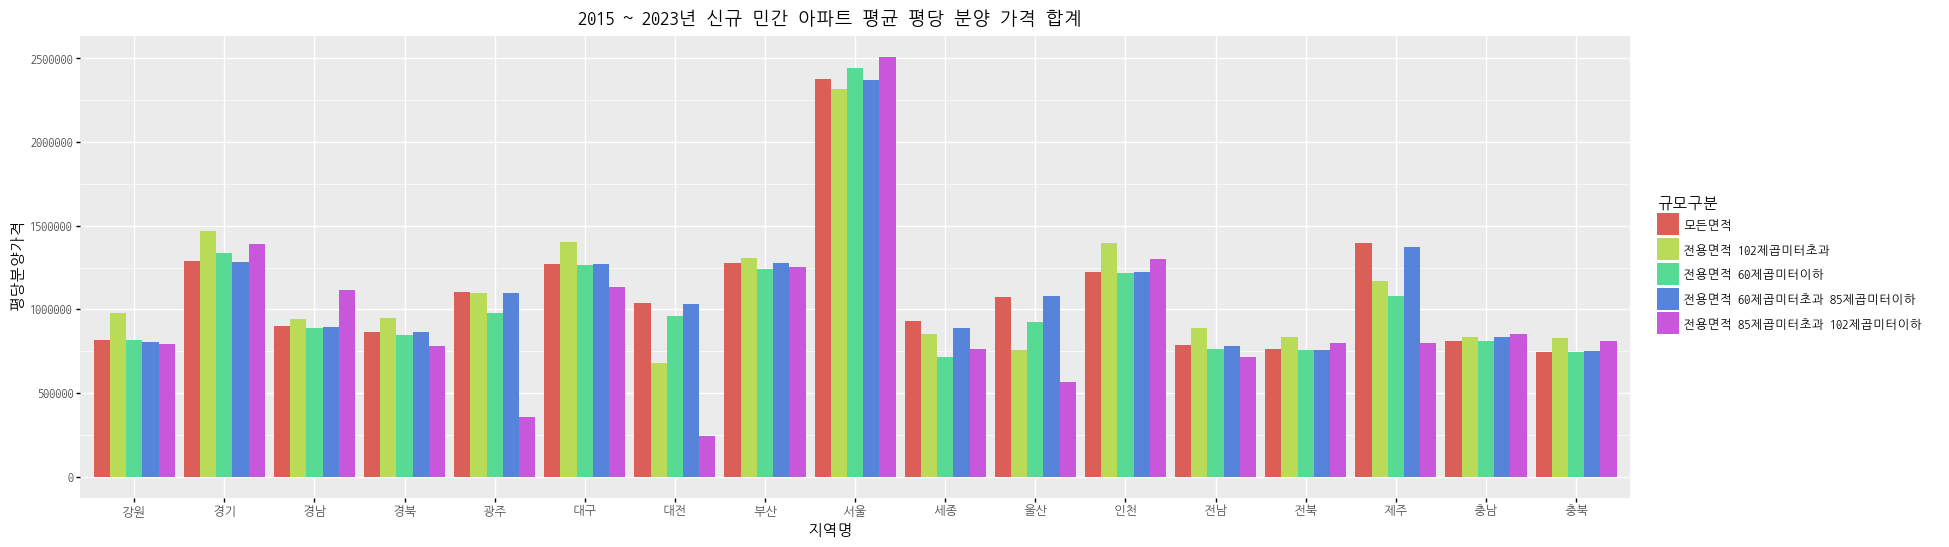

<ggplot: (-9223371888460770012)>

In [42]:
# 규모구분별 지역명별 평균 평당 분양 가격 합계 시각화
(
    ggplot(perSale_melt, aes(x='지역명', y='평당분양가격', fill='규모구분'))
        + geom_bar(stat='identity', position='dodge')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 합계')
)

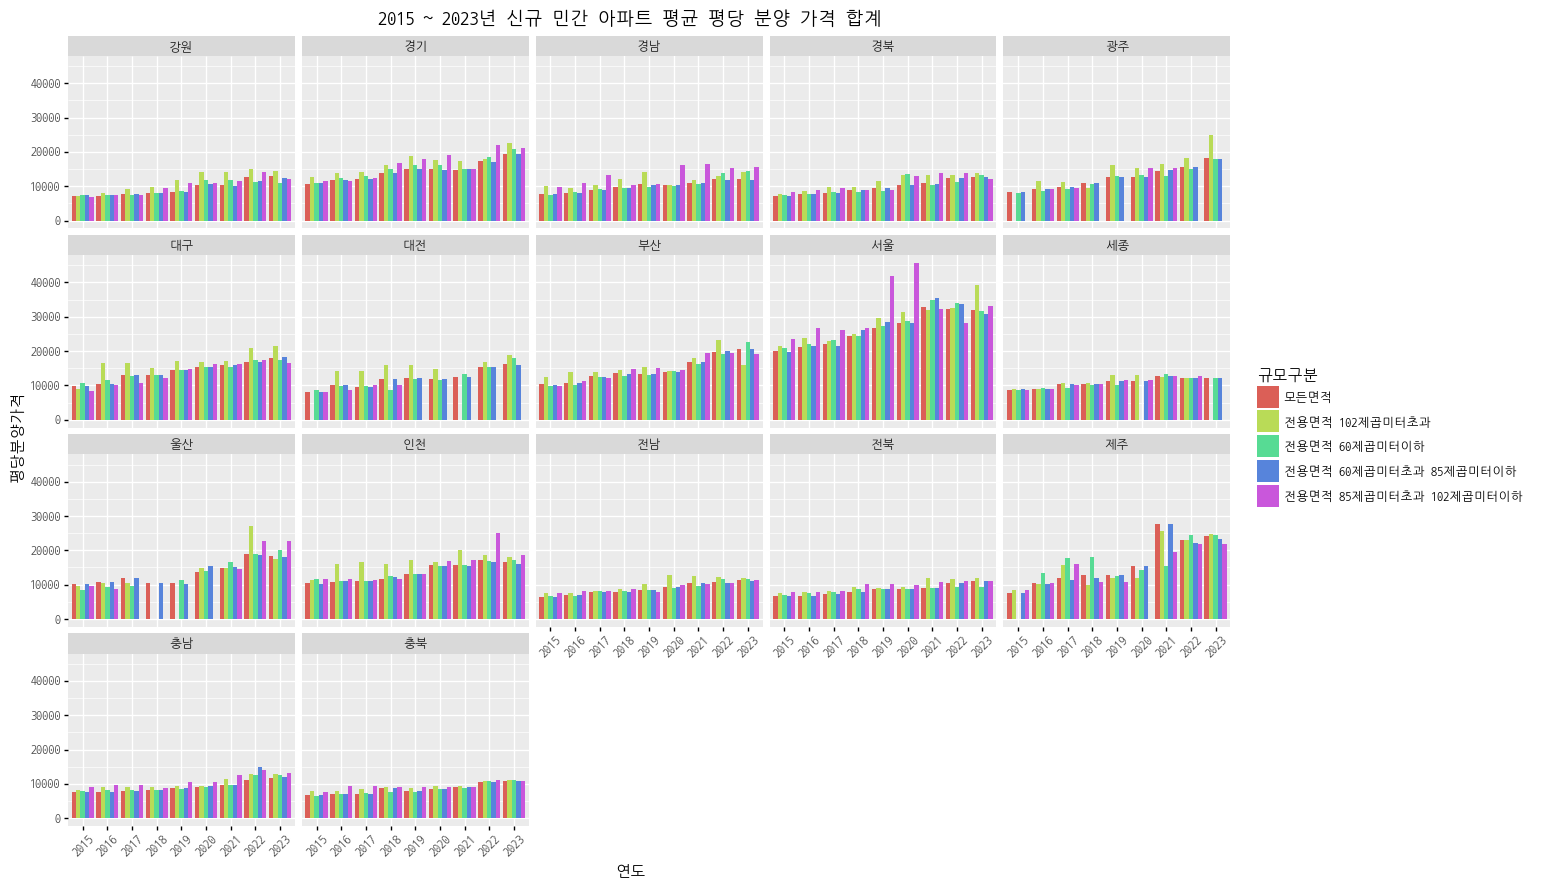

<ggplot: (-9223371888459298664)>

In [43]:
(
    ggplot(perSale, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('지역명')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(15, 10), axis_text_x=element_text(rotation=45))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 합계')
)

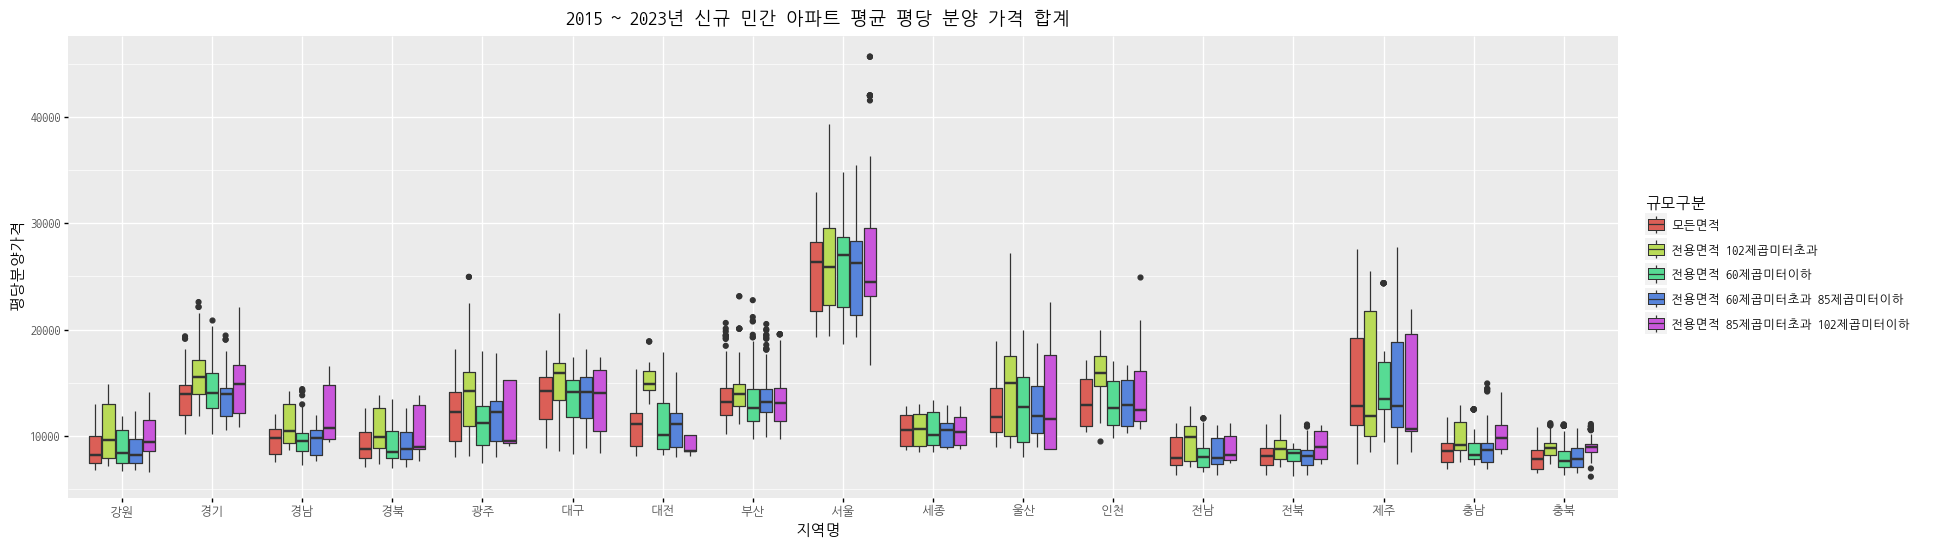

<ggplot: (-9223371888459441252)>

In [44]:
# boxplot
(
    ggplot(perSale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 합계')
)

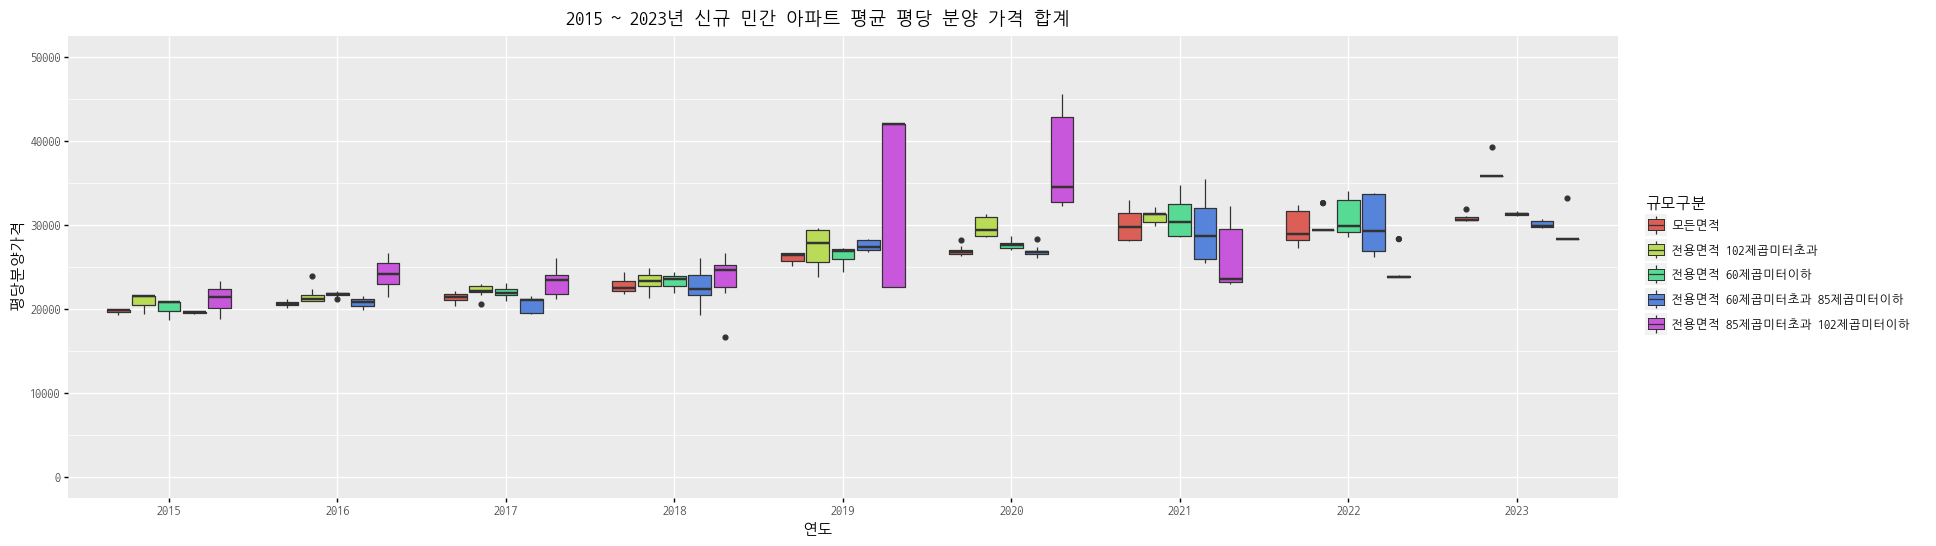

<ggplot: (-9223371888459003140)>

In [45]:
# 사업 규모가 가장 컸던 서울
perSale_seoul = perSale[perSale.지역명 == '서울']
(
    ggplot(perSale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 합계')
        + scale_y_continuous(limits=(0, 50000))
)

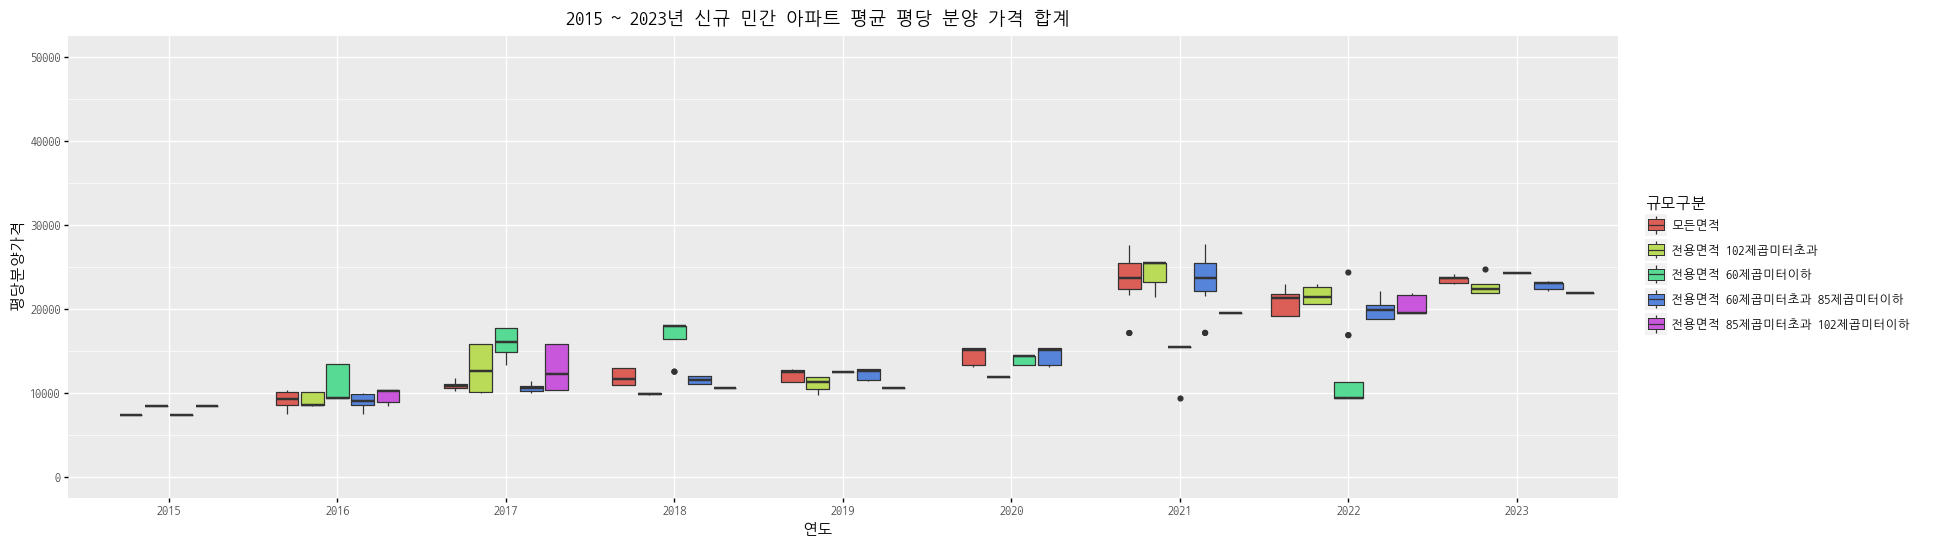

<ggplot: (-9223371888461130092)>

In [46]:
# 상승액이 가장 큰 지역 제주
perSale_jeju = perSale[perSale.지역명 == '제주']
(
    ggplot(perSale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 합계')
        + scale_y_continuous(limits=(0, 50000))
)

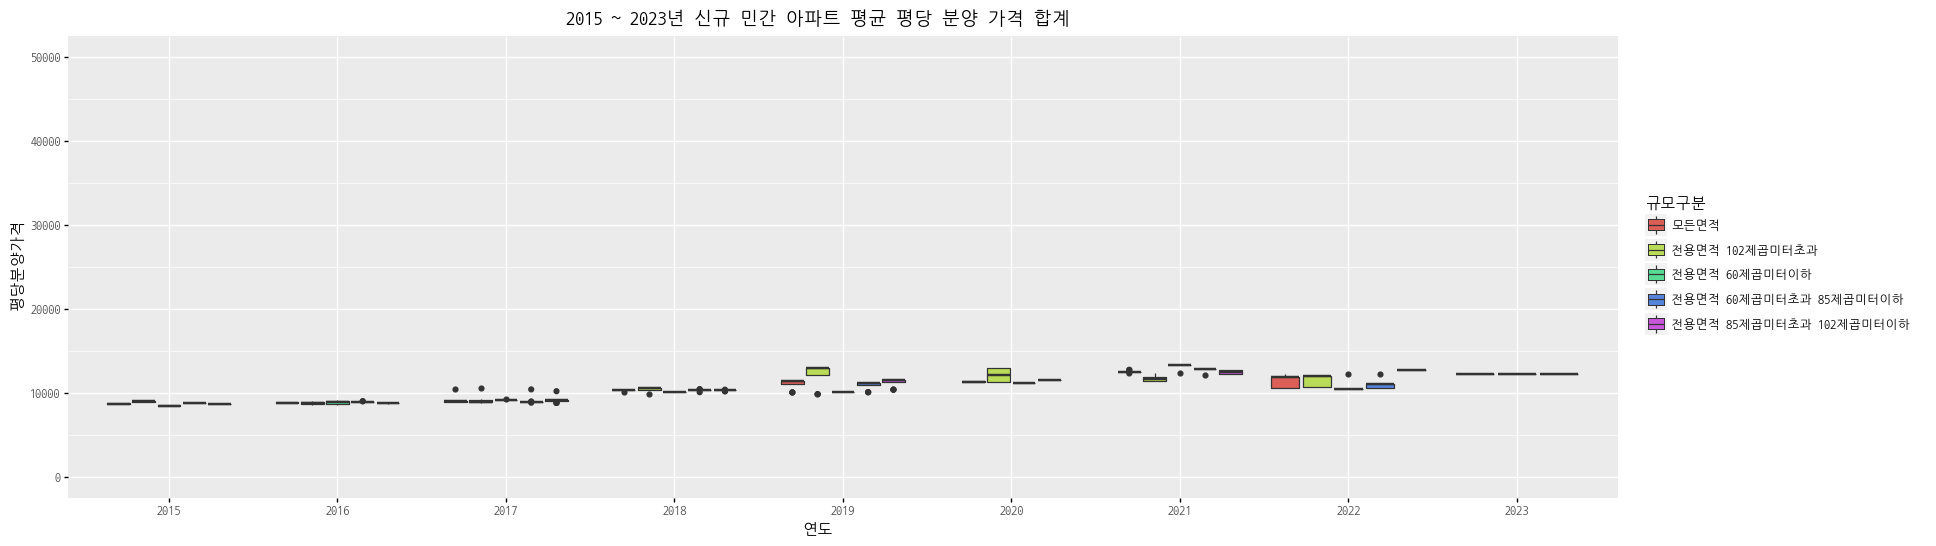

<ggplot: (-9223371888458295768)>

In [47]:
# 상승액이 가장 작은 지역 세종
perSale_sejong = perSale[perSale.지역명 == '세종']
(
    ggplot(perSale_sejong, aes(x='연도', y='평당분양가격', fill='규모구분'))
        + geom_boxplot()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))
        + ggtitle('2015 ~ 2023년 신규 민간 아파트 평균 평당 분양 가격 합계')
        + scale_y_continuous(limits=(0, 50000))
)